In [23]:
import re
import pandas as pd
pd.set_option('display.max_colwidth', None)
import csv
from datetime import datetime
import nltk
from nltk import FreqDist
from nltk.util import ngrams 
from nltk.tokenize import word_tokenize 
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

%run "util_sanitizer.ipynb"

import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 29, 19

from tqdm import tqdm

In [2]:
def get_texts(app_file):
    df = pd.read_json(app_file)
    documents = df.content[0:].str.cat(sep=' ').lower()
    documents = convert_numbers(documents)
    documents = remove_stop_words(documents)
    documents = remove_punctuation(documents)
    #documents = stemming(documents)
    documents = remove_apostrophe(documents)
    documents = remove_emoji(documents)
    return documents

In [3]:
def get_ngram(documents, n=2):
    tokens = documents.split()
    n_grams = ngrams(tokens, n)
    fdist = nltk.FreqDist(n_grams)
    return fdist

In [42]:
def clean(documents):
    documents = documents.lower()
    documents = convert_numbers(documents)
    documents = remove_stop_words(documents)
    documents = remove_punctuation(documents)
    #documents = stemming(documents)
    documents = remove_apostrophe(documents)
    documents = remove_emoji(documents)
    return documents

In [39]:
def get_dataset(app_file):
    df = pd.read_json(app_file)
    df['clean_text'] = df.apply(lambda x: clean(x['content']), axis=1)
    return df

In [6]:
def tokenize(sentence):
    sentence = sentence.lower()
    sentence = nltk.word_tokenize(sentence)
    return sentence

In [7]:
def create_dataframe(df, ngram, n=10):
    df_final = pd.DataFrame()
    for i in range(0, n):
        concatenated_n_gram = ' '.join(list(ngram.most_common()[i][0]))
        temp = df[df.clean_text.str.contains(concatenated_n_gram)].drop(['id', 'userImage', 'criterias', 'url', 'title'], axis=1)# .reset_index()
        temp['ngram'] = concatenated_n_gram
        # print(temp.shape)
        df_final = pd.concat([temp, df_final])
    return df_final.reset_index()

In [63]:
def lexico_value(w):
    val = lexico[lexico[0] == w][2]
    if len(val > 0):
        return val.values[0]
    else:
        return 0
lexico = pd.read_csv('data/lexico_v3.0.txt', header=None) # de http://ontolp.inf.pucrs.br/Recursos/downloads/OpLexicon/oplexicon_v3.0.zip

In [33]:
def plot_ngram(df, n = 20):
    bigram_df = pd.DataFrame(df.most_common(n),
                                 columns=['ngram', 'count'])
    # Create dictionary of bigrams and their counts
    d = bigram_df.set_index('ngram').T.to_dict('records')

    fig, ax = plt.subplots() #figsize=(10, 8))
    # Create network plot 
    G = nx.Graph()
    w = []
    # Create connections between nodes
    for k, v in d[0].items():
        G.add_edge(k[0], k[1], weight=(v))
        w.append((v) / 20)

    M = G.number_of_nodes()    

    pos = nx.spring_layout(G, k = 3)
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color = range(M+10,10,-1), cmap = plt.cm.Blues)

    # edges
    nx.draw_networkx_edges(G, pos, width=w)
    
    # label
    #nx.draw_networkx_labels(G, pos, font_size=14, font_family="serif")

    for key, value in pos.items():
        x, y = value[0], value[1]+.045
        ax.text(x, y,
            s=key,
            bbox=dict(facecolor='#FFCC00', alpha=1),
            horizontalalignment='center', fontsize=13) #, font_family="serif")
    
    
    plt.show()

# Banco do Brasil

In [28]:
bb_text = get_texts('br.com.bb.android.json')
ngram_bb = get_ngram(bb_text, 3)
ngram_bb.most_common()[:40]

[(('atende', 'todas', 'necessidades'), 198),
 (('parabéns', 'bom', 'bom'), 100),
 (('bom', 'excelente', 'prático'), 100),
 (('bom', 'ótimo', 'saiu'), 99),
 (('ótimo', 'saiu', 'casa'), 99),
 (('saiu', 'casa', 'pra'), 99),
 (('casa', 'pra', 'nd'), 99),
 (('pra', 'nd', 'facilitou'), 99),
 (('nd', 'facilitou', 'mt'), 99),
 (('facilitou', 'mt', 'vida'), 99),
 (('mt', 'vida', 'app'), 99),
 (('vida', 'app', 'atendeu'), 99),
 (('app', 'atendeu', 'todas'), 99),
 (('atendeu', 'todas', 'necessidades'), 99),
 (('todas', 'necessidades', 'bom'), 99),
 (('necessidades', 'bom', 'bom'), 99),
 (('bom', 'bom', 'ok'), 99),
 (('bom', 'ok', 'obrigado'), 99),
 (('ok', 'obrigado', 'bom'), 99),
 (('obrigado', 'bom', 'rápido'), 99),
 (('bom', 'rápido', 'fácil'), 99),
 (('rápido', 'fácil', 'utilizar'), 99),
 (('fácil', 'utilizar', 'nunca'), 99),
 (('utilizar', 'nunca', 'deu'), 99),
 (('nunca', 'deu', 'problema'), 99),
 (('deu', 'problema', 'parabéns'), 99),
 (('problema', 'parabéns', 'bom'), 99),
 (('bom', 'bom'

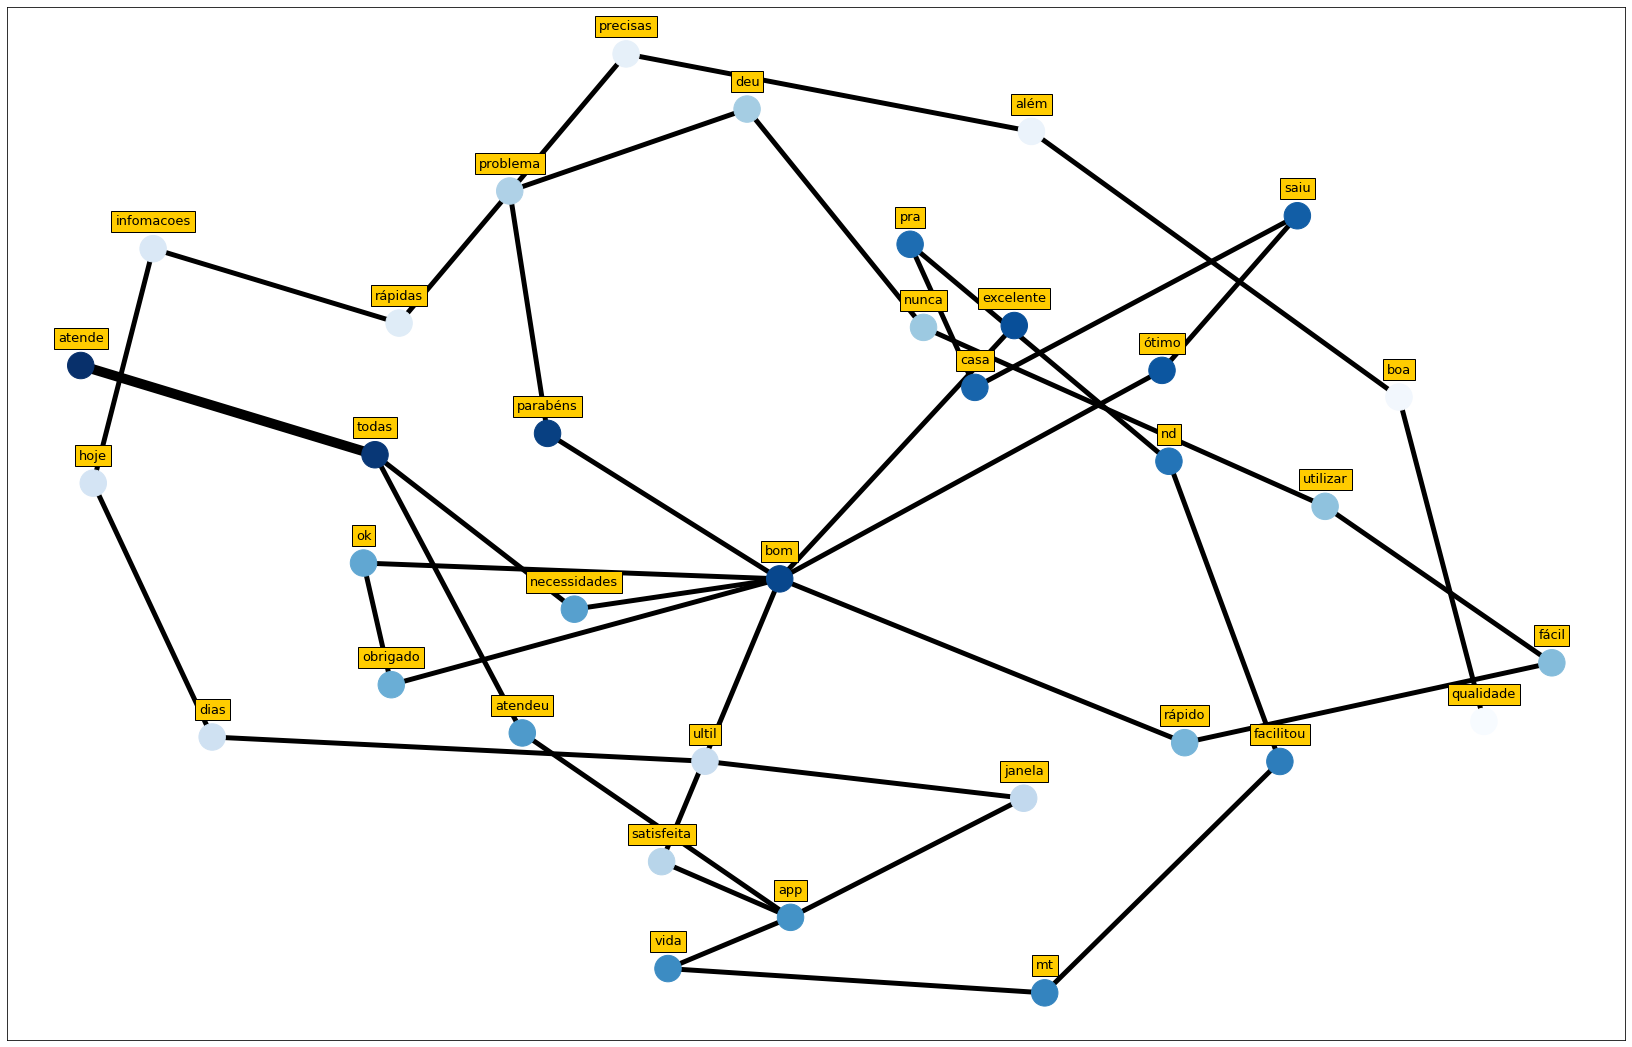

In [35]:
plot_ngram(ngram_bb, 40)

# Cartola

In [36]:
cartola_text = get_texts('data/br.com.mobits.cartolafc.json')
ngram_cartola = get_ngram(cartola_text, 2)
ngram_cartola.most_common()[:40]

[(('bom', 'bom'), 605),
 (('bom', 'jogo'), 398),
 (('banco', 'reserva'), 298),
 (('app', 'bom'), 297),
 (('banco', 'reservas'), 199),
 (('bom', 'aplicativo'), 199),
 (('saudades', 'melhor'), 199),
 (('dois', 'mil'), 198),
 (('fantasy', 'game'), 198),
 (('game', 'futebol'), 198),
 (('mundo', 'bom'), 198),
 (('coloquem', 'banco'), 198),
 (('conta', 'pró'), 198),
 (('não', 'entra'), 198),
 (('lixo', 'bom'), 198),
 (('melhor', 'aplicativo'), 103),
 (('futebol', 'mundo'), 102),
 (('bom', 'não'), 101),
 (('bom', 'app'), 101),
 (('joga', 'bom'), 101),
 (('futebol', 'melhor'), 100),
 (('top', 'bom'), 100),
 (('deveria', 'ganhar'), 100),
 (('colocar', 'banco'), 100),
 (('não', 'jogam'), 100),
 (('favor', 'bom'), 100),
 (('melhor', 'fantasy'), 100),
 (('jogo', 'cartola'), 100),
 (('não', 'consigo'), 100),
 (('aplicativo', 'bom'), 100),
 (('bom', 'saudades'), 100),
 (('jogo', 'recomendo'), 100),
 (('bom', 'nunca'), 100),
 (('falta', 'banco'), 100),
 (('ganhar', 'pontos'), 100),
 (('deveria', 'ter

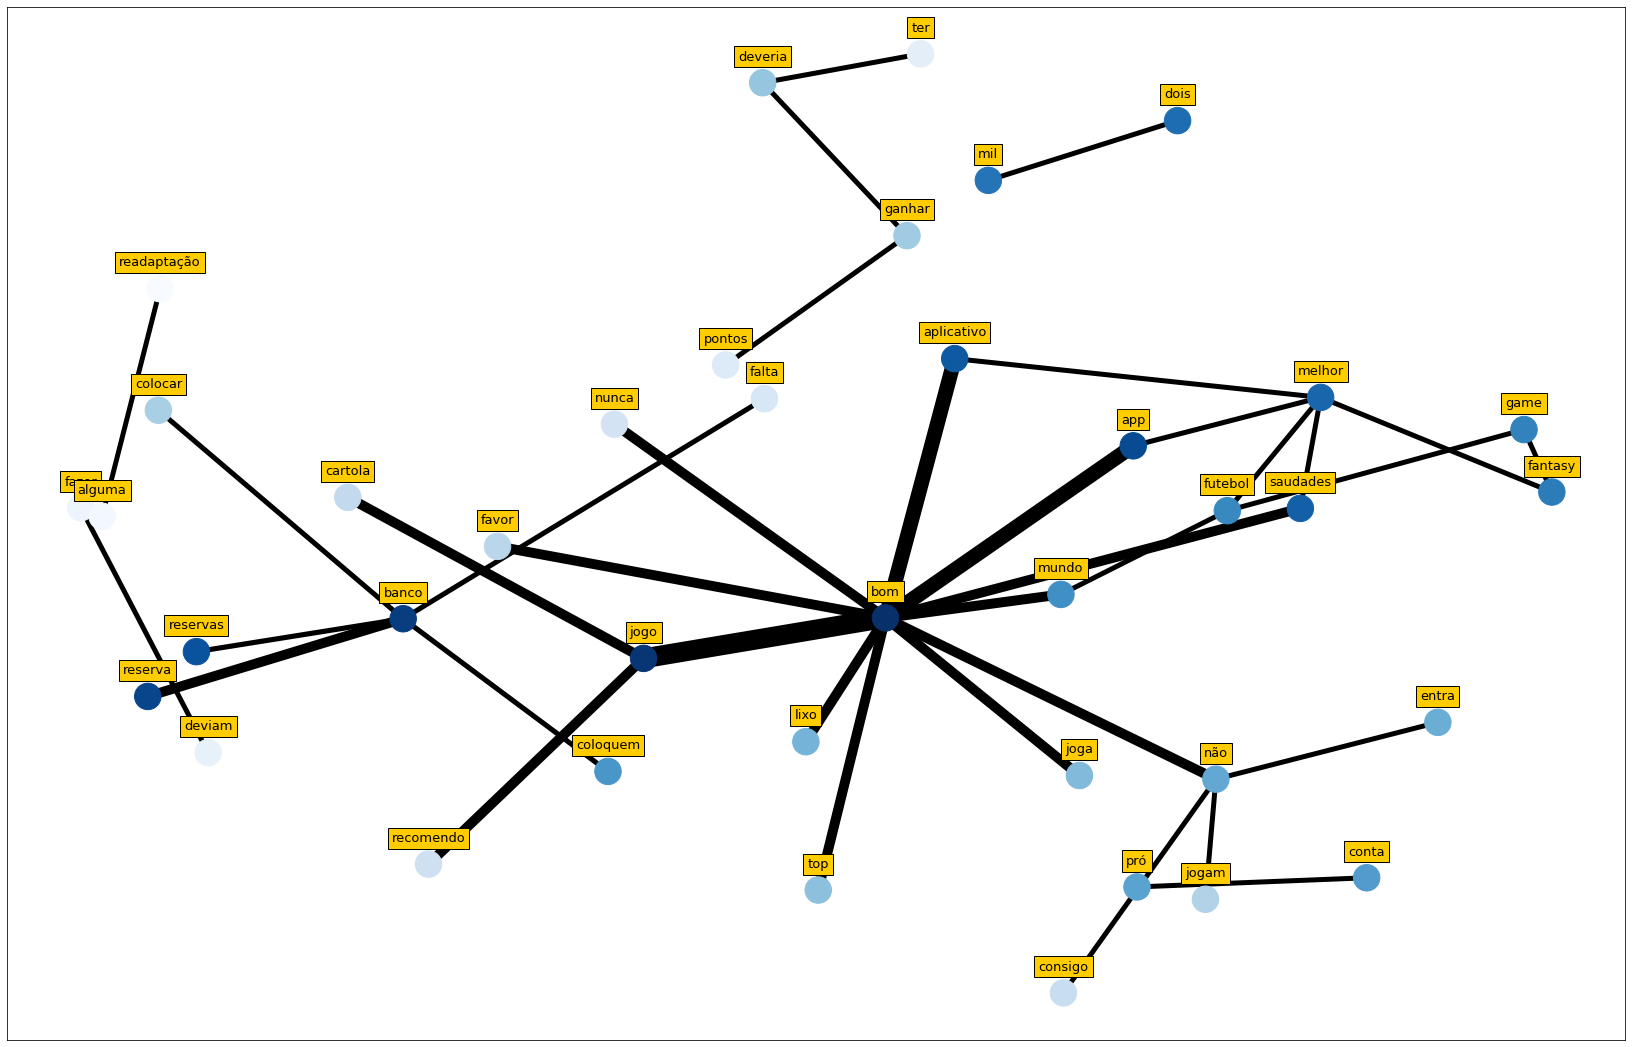

In [37]:
plot_ngram(ngram_cartola, 40)

### Análise de sentimento

In [43]:
df_bb = get_dataset('data/br.com.bb.android.json')

In [48]:
df_bb = df_bb.drop(['reviewId', 'userName', 'userImage'], axis=1)

In [49]:
df_bb.head()

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,clean_text
0,Melhor app,5,0,7.21.0.5,2020-05-24T17:19:53,None,None,melhor app
1,Muito bom excelente app,5,0,7.21.0.5,2020-05-24T17:19:29,None,None,bom excelente app
2,Quando eu preciso não ajuda em nada,1,0,7.21.0.5,2020-05-24T17:19:07,None,None,preciso não ajuda nada
3,Excelente Aplicativo!,5,0,7.21.1.0,2020-05-24T17:17:21,None,None,excelente aplicativo
4,Muito bom..fácil instalação... fácil de entender.. estou muito contente com essa novidade para mim ... obrigado à todos!,5,0,7.21.0.5,2020-05-24T17:17:13,None,None,bom fácil instalação fácil entender contente novidade mim obrigado todos


In [ ]:
df_bb['sentiment'] = 0
df_bb['words'] = 0
df_bb['neut'] = 0
df_bb['pos'] = 0
df_bb['neg'] = 0

In [66]:
for row in tqdm(range(df_bb.shape[0])):
    res = []
    for w in tokenize(str(df_bb.clean_text[row])):
        res.append(lexico_value(w))
    
    temp = pd.DataFrame.from_dict(Counter(res), orient='index').T.rename(columns={0: 'neut', -1: 'neg', 1: 'pos'})
    df_bb.loc[row, 'sentiment'] = sum(res)
    df_bb.loc[row, 'words'] = len(res)
    df_bb.loc[row, 'neut'] = [temp['neut'][0] if 'neut' in temp.columns else 0][0]
    df_bb.loc[row, 'pos'] = [temp['pos'][0] if 'pos' in temp.columns else 0][0]
    df_bb.loc[row, 'neg'] = [temp['neg'][0] if 'neg' in temp.columns else 0][0]

100%|████████████████████████████████████████████████████████████████████| 10000/10000 [02:09<00:00, 77.20it/s]


In [80]:
scaler = MinMaxScaler()
df_bb['sentiment_normalized'] = scaler.fit_transform(df_bb[['sentiment']]) * 2 - 1
df_bb['sentiment_binary'] = df_bb.apply(lambda x:math.floor(x['sentiment_normalized']), axis=1)
#df_bb['year_month'] = df_bra['date'].map(lambda x: datetime.strptime(df_bb['at'][0], '%Y-%m-%dT%H:%M:%S')str(x.year) + '-' + str(x.month).zfill(2))

In [85]:
max(df_bb.sentiment)

6.0

In [81]:
df_bb.to_csv('ngram.csv', index=False, sep=";", quotechar='"', quoting=csv.QUOTE_ALL, doublequote=True)

# Referências

- https://www.inf.pucrs.br/linatural/wordpress/recursos-e-ferramentas/oplexicon/
- https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/
- https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html#networkx.drawing.nx_pylab.draw_networkx_labels
- https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_directed.html#sphx-glr-download-auto-examples-drawing-plot-directed-py